<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Кирилл! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы».


Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂

<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

# Прекод

# Сборный проект-4

Вам поручено разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.

### Описание данных

Данные лежат в папке `/datasets/image_search/` или доступны по [ссылке](https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip).

В файле `train_dataset.csv` находится информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `train_images` содержатся изображения для тренировки модели.

В файле `CrowdAnnotations.tsv` — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.
3. Доля людей, подтвердивших, что описание соответствует изображению.
4. Количество человек, подтвердивших, что описание соответствует изображению.
5. Количество человек, подтвердивших, что описание не соответствует изображению.

В файле `ExpertAnnotations.tsv` содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.

3, 4, 5 — оценки трёх экспертов.

Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.

В файле `test_queries.csv` находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `test_images` содержатся изображения для тестирования модели.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Да, это хорошая практика - дать описание контекста и проблемы, которую мы решаем. </div>

## 1. Исследовательский анализ данных

Наш датасет содержит экспертные и краудсорсинговые оценки соответствия текста и изображения.

В файле с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов. Для решения задачи вы должны эти оценки агрегировать — превратить в одну. Существует несколько способов агрегации оценок, самый простой — голосование большинства: за какую оценку проголосовала большая часть экспертов (в нашем случае 2 или 3), та оценка и ставится как итоговая. Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст можно исключить из датасета.

Вы можете воспользоваться другим методом агрегации оценок или придумать свой.

В файле с краудсорсинговыми оценками информация расположена в таком порядке:

1. Доля исполнителей, подтвердивших, что текст **соответствует** картинке.
2. Количество исполнителей, подтвердивших, что текст **соответствует** картинке.
3. Количество исполнителей, подтвердивших, что текст **не соответствует** картинке.

После анализа экспертных и краудсорсинговых оценок выберите либо одну из них, либо объедините их в одну по какому-то критерию: например, оценка эксперта принимается с коэффициентом 0.6, а крауда — с коэффициентом 0.4.

Ваша модель должна возвращать на выходе вероятность соответствия изображения тексту, поэтому целевая переменная должна иметь значения от 0 до 1.


### Загрузка библиотек и ознакомление с данными

In [1]:
#conda install pytorch torchvision torchaudio pytorch-cuda=12.1 -c pytorch -c nvidia
import torch
torch.cuda.is_available()

True

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Мне кажется оптимальнее проверить наличие cuda после всех импортов</div>

In [2]:
#pip install -U crowd-kit lightning sentence-transformers gdown

In [3]:
import pandas as pd
import numpy as np
import torchvision.models as models
from torchvision.models import ResNet18_Weights
import seaborn as sns
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
import os
import torch.nn as nn
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
import re
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from tqdm.notebook import tqdm
tqdm.pandas()
from sklearn.model_selection import GroupShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, RobustScaler
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from math import ceil
import random
from transformers import BertTokenizer
from tqdm import notebook
import transformers

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kkkul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kkkul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kkkul\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kkkul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kkkul\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Да, это хорошая практика - дать описание контекста и проблемы, которую мы решаем. </div>

In [4]:
df_train = pd.read_csv('./train_dataset.csv')
df_train.head(10)

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
5,3030566410_393c36a6c5.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
6,3155451946_c0862c70cb.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
7,3222041930_f642f49d28.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
8,343218198_1ca90e0734.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
9,3718964174_cb2dc1615e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Очень "больная тема" - это загрузка данных и использование путей.Очевидно, что на моей машине (и скорее всего машине любого другого пользователя) пути к данным будут другие. И это "рабочая ситуация для большинства проектов. Решается она следующим образом:

    
  - Путь к директории с данными  должен быть задан в константе, в самом начале работы. Тогда ревьюеру (или любому другому пользователю твоего ноутбука, даже тебе самому, если нужно будет провести презентацию руководителю на другом компьютере) нужно будет изменить только этот путь.
  - Все остальные пути внутри ноутбука должны быть созданы с исопользованием этой константы, а не заданы жестко (есть сленговое определение "хардкод").  Более  того, настоятельно рекомендую для создания сложных путей вместо простой конкатерации строк с исползованием '/' использовать os.path.join(), тогда код будет одинаково надежно работать и в среде Windows и Linux (MacOS).
   


А вот это образец универсального кода для загрузки данных    
    
    DATA_PATH = твой путь    
    
    df_train = pd.read_csv(os.path.join(DATA_PATH, 'train_dataset.csv'))
    ....
    
--------------
    
Обычно этот комментарий красный, в твоем случае ограничился желтым т.к. ты используешь относительне пути и технически достаточно просто сменить рабочую папку.    
</div>

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


In [6]:
crowd_columns = ['image', 'query_id', 'score_confirm', 'num_agree', 'num_disagree']
df_crowd = pd.read_csv('./CrowdAnnotations.tsv', sep='\t', names=crowd_columns)
df_crowd.head(10)

,image,query_id,score_confirm,num_agree,num_disagree
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.000000,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.000000,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.000000,0,3
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.000000,0,3
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.000000,0,3
5,1056338697_4f7d7ce270.jpg,2204550058_2707d92338.jpg#2,0.000000,0,3
6,1056338697_4f7d7ce270.jpg,2224450291_4c133fabe8.jpg#2,0.000000,0,3
7,1056338697_4f7d7ce270.jpg,2248487950_c62d0c81a9.jpg#2,0.333333,1,2
8,1056338697_4f7d7ce270.jpg,2307118114_c258e3a47e.jpg#2,0.000000,0,3
9,1056338697_4f7d7ce270.jpg,2309860995_c2e2a0feeb.jpg#2,0.000000,0,3


In [7]:
df_crowd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   image          47830 non-null  object 
 1   query_id       47830 non-null  object 
 2   score_confirm  47830 non-null  float64
 3   num_agree      47830 non-null  int64  
 4   num_disagree   47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


In [8]:
expert_columns = ['image', 'query_id', 'expert_1', 'expert_2', 'expert_3']
df_exp = pd.read_csv('./ExpertAnnotations.tsv', sep='\t', names=expert_columns)
df_exp.head(10)

,image,query_id,expert_1,expert_2,expert_3
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2
5,1056338697_4f7d7ce270.jpg,3360930596_1e75164ce6.jpg#2,1,1,1
6,1056338697_4f7d7ce270.jpg,3545652636_0746537307.jpg#2,1,1,1
7,1056338697_4f7d7ce270.jpg,434792818_56375e203f.jpg#2,1,1,2
8,106490881_5a2dd9b7bd.jpg,1425069308_488e5fcf9d.jpg#2,1,1,1
9,106490881_5a2dd9b7bd.jpg,1714316707_8bbaa2a2ba.jpg#2,2,2,2


In [9]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     5822 non-null   object
 1   query_id  5822 non-null   object
 2   expert_1  5822 non-null   int64 
 3   expert_2  5822 non-null   int64 
 4   expert_3  5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.5+ KB


In [10]:
df_test = pd.read_csv('./test_queries.csv', sep='|')
df_test.head(10)

,Unnamed: 0,query_id,query_text,image
0,0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt an...",1177994172_10d143cb8d.jpg
1,1,1177994172_10d143cb8d.jpg#1,Two boys are squirting water guns at each other .,1177994172_10d143cb8d.jpg
2,2,1177994172_10d143cb8d.jpg#2,Two boys spraying each other with water,1177994172_10d143cb8d.jpg
3,3,1177994172_10d143cb8d.jpg#3,Two children wearing jeans squirt water at eac...,1177994172_10d143cb8d.jpg
4,4,1177994172_10d143cb8d.jpg#4,Two young boys are squirting water at each oth...,1177994172_10d143cb8d.jpg
5,5,1232148178_4f45cc3284.jpg#0,A baby girl playing at a park .,1232148178_4f45cc3284.jpg
6,6,1232148178_4f45cc3284.jpg#1,A closeup of a child on a playground with adul...,1232148178_4f45cc3284.jpg
7,7,1232148178_4f45cc3284.jpg#2,A young boy poses for a picture in front of a ...,1232148178_4f45cc3284.jpg
8,8,1232148178_4f45cc3284.jpg#3,A young girl is smiling in front of the camera...,1232148178_4f45cc3284.jpg
9,9,1232148178_4f45cc3284.jpg#4,There is a little blond hair girl with a green...,1232148178_4f45cc3284.jpg


In [11]:
df_train['query_text'].unique().shape

(977,)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Мне кажется что знакомство с данными можно провести более интересно и сформировать значимые выводы. Попробую сформулировать вопросы, ответить на которые будет интересно:
  - Количество уникальных изображений в обучающем и тестовом наборах
  - Количество уникальных запросов  
  - Количество оценок в экспертном и краудсорсинговом наборах.

Ну и конечно интересно посмотреть на изображения из датасета (возможно вместе с описаниями).   
    
    
</div>

### Исследование с помощью графического анализа

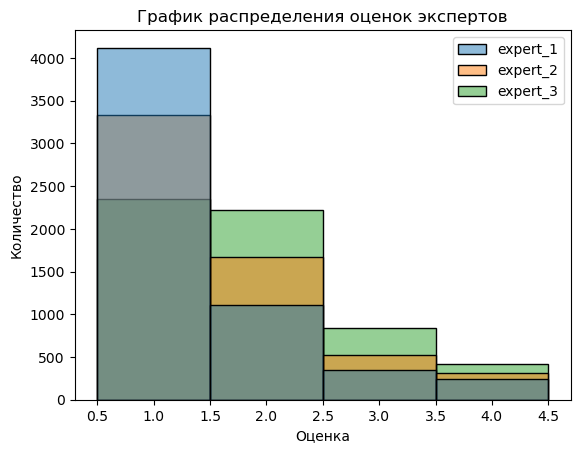

In [12]:
sns.histplot(data=df_exp, bins=4, discrete=True);
plt.title('График распределения оценок экспертов');
plt.xlabel('Оценка');
plt.ylabel('Количество');

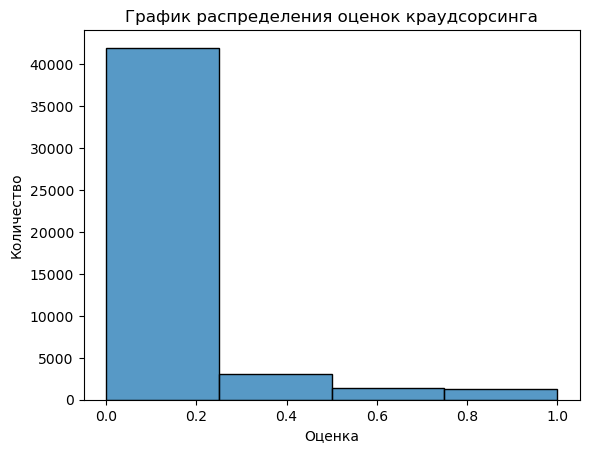

In [13]:
sns.histplot(data=df_crowd, x='score_confirm', bins=4);
plt.title('График распределения оценок краудсорсинга');
plt.xlabel('Оценка');
plt.ylabel('Количество');

Эксперты склонны давать описаниям оценки несоответствия. Также с оценками каудсорсинга, оценок несоответствия намного больше, чем положительных.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Помнишь принцип "явное лучше неявного"? Давай попробуем немного навести порядок в структуре проекта.
    
Закончен исследовательский анализ данных, значит закончить его мы должны выводами.
    
А дальше ты начинаешь делать предобработку, цель которой - получить датафрейм с признаками (парами изображений) и таргетами (оценками). Значит давай для этих операций мы созданим свой раздел.    
</div>


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
<b>v2</b>    
Пожалуйста напиши выводы, мы узнали после знакомства с нашими датафреймами?
       
</div>

После подгрузки и изучения исходных данных, мы обнаружили, что для обучения моделей нам предоставлено 1000 уникальных изображений, большая часть которых представлена изображениями детей, что по условиям задачи необходимо удалить. Это может повлиять на снижении качества обучения наших моделей. Количество уникальных запросов 977, это обозначает, что для многих фотографий запросы просто дублировались рандомно, что тоже снизит качество моделей. Количество оценок от краудсорса намного превышает количество уникальных фотографий и запросов, вероятно, для одних и тех же пар запросов и фотографий были поставлены разные оценки, что может ввести в заблуждение модели, поэтому для генерации таргета от использования краудсосрсинговых оценок принято решение отказаться. Также с помощью графического анализа было установлено, что большинство экспертов и людей из краудсорсинга ставит оценку несоответствия фотографиям, что может сказаться на способности моделей связывать описания и фотографии качественно.

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Вывод добавлен

</div>

### Предобработка данных

In [14]:
df_exp['mean_score'] = (((df_exp['expert_1'] + df_exp['expert_2'] + df_exp['expert_3']) / 3) - 1) / (4 - 1)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Похоже твой подход содержит ошибку. В колонке mean_score ты хочешь получить оценку, приведенную к шкале 0-1.  Но ты получаешь шкалу 0,25-1, т.к. делашь неправильное линейное преобразование.


Вместо деления на 4 используй другую формулу `x_new =  (x - min) / (max - min)`    
    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> исправлено 👍 </div>

In [15]:
df_exp = df_exp.drop(['expert_1', 'expert_2', 'expert_3'], axis=1)

In [16]:
df_exp.head(10)

,image,query_id,mean_score
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,0.000000
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,0.111111
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,0.111111
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,0.222222
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,0.111111
5,1056338697_4f7d7ce270.jpg,3360930596_1e75164ce6.jpg#2,0.000000
6,1056338697_4f7d7ce270.jpg,3545652636_0746537307.jpg#2,0.000000
7,1056338697_4f7d7ce270.jpg,434792818_56375e203f.jpg#2,0.111111
8,106490881_5a2dd9b7bd.jpg,1425069308_488e5fcf9d.jpg#2,0.000000
9,106490881_5a2dd9b7bd.jpg,1714316707_8bbaa2a2ba.jpg#2,0.333333


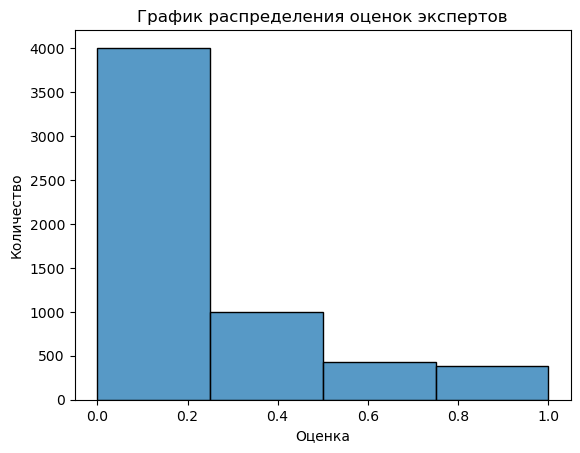

In [17]:
sns.histplot(data=df_exp, x='mean_score', bins=4);
plt.title('График распределения оценок экспертов');
plt.xlabel('Оценка');
plt.ylabel('Количество');

In [18]:
df_train_merged = pd.merge(df_train, df_exp, how='inner', on=['image', 'query_id'])


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Опять напоминаю про "явное лучше неявного".
    
Сейчас ты получил итоговый датафрейм используя только экспертны оценки.
    
Я не против, более того, я считаю это лучшей из возможных стратегий. Но пожалйста, напиши что и зачем ты делаешь, дай обоснование.    
    
--------------
    
В этом проекте есть несколько возможных стратегий работы с обучающими и краудсорс оценками,  вот эти стратегии с плюсами и минусами:
   
    
 - использовать соединение через outer, в этом случае, при корректной обработке пропусков мы можем получить более 50К размеченых пар. К плюсам данного подхода можно отнести большое количество данных. Минус - в основном это будут данные, размеченные краудсорсерами, а там качество раметки ниже.
 - использовать только экспертные оценки. плюс - высокое качество данных (разметка имеет шкалу). Минус - данных меньше.  Поясню по поводу качества разметки на примере: если на изображении одна собака, а в описании "две собаки бегут по берегу", то эксперты поставять соответствие 0,6-0,7 (переводя в шкалу 0-1), а краудсорсеры поставят 0.  Но на экспертных оценках модель хотя-бы научится находить собак, а на краудсор оценках ничему не начится.
    
 - использование соединения через left.  Данный подход очевидно проигрывает второму варианту: данных столько же, нужно дополнительно возиться с объединением, но качество разметки снижается.. Но это соответсвует предложениям авторов проекта, поэтому такой подход имеет право на жизнь
    
 - объединение через inner. Тут все плохо - и данных ОЧЕНЬ мало (в два раза меньше, чем использовать только экспертные оценки) и качество у них "подпорчено". И навыков по обработке пропусков не получаем.....    
    
</div>

In [19]:
df_train_merged.head(10)

,image,query_id,query_text,mean_score
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.000000
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.000000
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.222222
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.000000
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.000000
5,3030566410_393c36a6c5.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.444444
6,3155451946_c0862c70cb.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.000000
7,3222041930_f642f49d28.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.000000
8,343218198_1ca90e0734.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.000000
9,3718964174_cb2dc1615e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.000000


In [20]:
df_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5822 entries, 0 to 5821
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       5822 non-null   object 
 1   query_id    5822 non-null   object 
 2   query_text  5822 non-null   object 
 3   mean_score  5822 non-null   float64
dtypes: float64(1), object(3)
memory usage: 227.4+ KB


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
ОК, есть итоговый датафрейм (признаки-таргет) с которым мы можем продолжать работу</div>

## 2. Проверка данных

In [21]:
#напишем функцию разметки слов для более качественной лемматизации
#def get_wordnet_pos(word):
#    tag = nltk.pos_tag([word])[0][1][0].upper()
#    tag_dict = {"J": wordnet.ADJ,
#                "N": wordnet.NOUN,
#                "V": wordnet.VERB,
#                "R": wordnet.ADV}
#
#    return tag_dict.get(tag, wordnet.NOUN)

In [22]:
#напишем функцию лемматизации
#def lemmatize(text):
#    lemmatizer = WordNetLemmatizer()
#    lemm_list = nltk.word_tokenize(text)
#    lemm_text = " ".join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in lemm_list])
#
#    return lemm_text

In [23]:
#напишем функцию очистки текста от лишних символов и перевода в один регистр
#def clear_text(text):
#    return ' '.join(re.sub(r"[^a-zA-Z' ]", ' ', text).split()).lower()

In [24]:
#df_train_merged['query_text_lem'] = df_train_merged['query_text'].progress_apply(lemmatize)

In [25]:
#df_train_merged['query_text_lem'] = df_train_merged['query_text_lem'].apply(clear_text)

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Убрал из кода лемматизацию и очистку текста, так как реализовал BERT

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Идея с лемматизацией хороша. Но она очень "дорогая" - хорошая лемматизация занимает время. К тому же лемматизация требует сил на написание и отладку кода. И не дай бог ты "потащишь" её и в инференс....
    
Лемматизация в этом проекте может понадобиться в двух случаях: при чистке запросов от детских изображениях и при векторизации.
    
В случае чистки я считаю возможным упростить себе жизнь - взять возможные словоформы "запрещенных" слов. Как правиль их всего две - единственное и множественное число.
    
А что касается векторизации,то ты используешь BERT, а эта модель обучалась на сырых, не обработанных текстах (точнее всю предобработку, какую надо, делает токенайзер).  Лемматизация, как и чистка текста от знаков препинания в данном случае противопоказана.    
    
</div>

In [26]:
stop_words = ['child', 'children', 'baby', 'toddler', 'teenager', 'boy', 'girl', 'kid', 'lad', 'babies', 'toddlers',
             'teenagers', 'boys', 'girls', 'kids']
delete_img = []

for i in range(len(df_train_merged['query_text'])):
    for word in stop_words:
        if word in df_train_merged.loc[i, 'query_text'].lower().split() and df_train_merged.loc[i, 'mean_score'] > 0.2:
            delete_img.append(df_train_merged.loc[i, 'image'])

Были удалены фотография и описания, содержащие неприемлимый контент, с оценками соответствия более 0.4.

In [27]:
df_train_merged = df_train_merged[~df_train_merged['image'].isin(delete_img)]

In [28]:
df_train_merged = df_train_merged.drop(['query_id'], axis=1).reset_index(drop=True)

In [29]:
#удаление фотографий, код закомментен, так как после первого запуска, фотографии уже удалены
#path = './train_images/'
#for img in set(delete_img):
#    os.remove(path + img)

In [30]:
df_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3625 entries, 0 to 3624
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       3625 non-null   object 
 1   query_text  3625 non-null   object 
 2   mean_score  3625 non-null   float64
dtypes: float64(1), object(2)
memory usage: 85.1+ KB


In [31]:
df_train_merged.head(10)

,image,query_text,mean_score
0,1056338697_4f7d7ce270.jpg,A young child is wearing blue goggles and sitt...,0.000000
1,3155451946_c0862c70cb.jpg,A young child is wearing blue goggles and sitt...,0.000000
2,3222041930_f642f49d28.jpg,A young child is wearing blue goggles and sitt...,0.000000
3,486712504_36be449055.jpg,A young child is wearing blue goggles and sitt...,0.000000
4,1056338697_4f7d7ce270.jpg,A girl wearing a yellow shirt and sunglasses s...,0.111111
5,2616643090_4f2d2d1a44.jpg,A girl wearing a yellow shirt and sunglasses s...,0.000000
6,2648165716_02e2e74fd6.jpg,A girl wearing a yellow shirt and sunglasses s...,0.000000
7,1056338697_4f7d7ce270.jpg,A man sleeps under a blanket on a city street .,0.111111
8,463978865_c87c6ca84c.jpg,A man sleeps under a blanket on a city street .,0.333333
9,488590040_35a3e96c89.jpg,A man sleeps under a blanket on a city street .,0.222222


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Молодец, что не просто удалил все тексты, где есть "детская тематика", но и учел что оценка соответствия пары текст-изображение должно подтверждаться оценкой.
    
На всякий случай подсвечу, что есть еще один способ поиска "детских" изображений. Он основан на том, что `query_id` содержит в с себе имя изображения, для которого он был написан (такая пасхалочка от авторов датасета).
    
 - Определить список плохих комментариев
 - У `query_id`  плохих комментариев отрезать два последних символа и получим список плохих изображений.
        


## 3. Векторизация изображений

In [32]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('device:', device)
path = './'

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Нормализация данных
])

# Загрузка предварительно обученной ResNet-18
resnet = models.resnet18(weights=ResNet18_Weights.DEFAULT).to(device)
# заморозка слоев
for param in resnet.parameters():
    param.requires_grad_(False)
# убираем все слои, кроме двух последних
resnet = nn.Sequential(*list(resnet.children())[:-1])
# перевод модели в режим предсказания
resnet.eval()

images_paths = list(df_train_merged['image'])
print('Изображений в папке:',len(set(images_paths)))

# Создание пустого массива для хранения векторов
processed_features = []
# Цикл для обработки каждого batch изображений
for image_path in images_paths:
    image_path = path + 'train_images/' + image_path
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        features = resnet(image_tensor).flatten().cpu().numpy()

    processed_features.append(features)  # Добавление векторов признаков в массив

processed_features = pd.DataFrame(processed_features)
processed_features.head()

device: cuda
Изображений в папке: 648


,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.693983,3.031819,2.916987,0.951920,0.936226,1.245220,0.826550,1.108059,0.169696,0.365279,...,0.444238,0.717753,0.294677,0.728790,1.153809,0.750845,1.196695,0.085011,1.056859,0.098236
1,0.476787,0.516117,1.505917,0.879465,0.001574,0.585608,0.055786,0.104646,0.206305,1.083964,...,0.627553,1.203490,2.934107,0.498592,1.248345,1.117930,1.121786,2.810126,1.892204,1.877237
2,1.859864,2.073176,1.116257,1.751575,0.208846,1.309824,0.316693,0.456553,2.370869,0.082151,...,0.407417,1.213631,1.492942,0.690386,1.285157,0.822073,2.123312,1.957901,1.500283,0.300742
3,1.810253,2.253124,0.628388,1.860260,0.654312,0.030167,1.013323,1.381325,1.189101,4.414523,...,0.260167,0.514834,0.756088,0.509969,1.216290,0.606870,0.671893,0.518883,1.576427,0.530411
4,0.693983,3.031819,2.916987,0.951920,0.936226,1.245220,0.826550,1.108059,0.169696,0.365279,...,0.444238,0.717753,0.294677,0.728790,1.153809,0.750845,1.196695,0.085011,1.056859,0.098236


In [33]:
processed_features.shape

(3625, 512)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Здесь все ОК, векторизация изображений произведена верно </div>

Векторизация изображений была произведена с помощью  ResNet-18.

## 4. Векторизация текстов

In [34]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

tokenized = df_train_merged['query_text'].apply(
    lambda x: tokenizer.encode(x, add_special_tokens=True))

max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])

attention_mask = np.where(padded != 0, 1, 0)

model = transformers.BertModel.from_pretrained('bert-base-uncased')

batch_size = 1
embeddings = []
for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
        batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)])
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])

        batch_embeddings = model(batch, attention_mask=attention_mask_batch)

        embeddings.append(batch_embeddings[0][:,0,:].detach().numpy())

features = np.concatenate(embeddings)

C:\Users\kkkul\anaconda3\lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


  0%|          | 0/3625 [00:00<?, ?it/s]

AttributeError: 'BaseModelOutputWithPoolingAndCrossAttentions' object has no attribute 'to'

In [ ]:
def embed(text):
    tokenized = text.apply(
    lambda x: tokenizer.encode(x, add_special_tokens=True))
    padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])
    attention_mask = np.where(padded != 0, 1, 0)
    batch_size = 1
    embeddings = []
    for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
        batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)])
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])

        with torch.no_grad():
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)

        embeddings.append(batch_embeddings[0][:,0,:].numpy())
    return np.concatenate(embeddings)

In [ ]:
features.shape

In [ ]:
#stopwords = list(set(nltk_stopwords.words('english')))
#count_tf_idf = TfidfVectorizer(stop_words=stopwords)
#tf_idf = count_tf_idf.fit_transform(df_train_merged['query_text_lem']).toarray()

In [ ]:
#tf_idf.shape

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
<b>v2</b>  
Вижу что  ты используешь BERT, молодец. Но для "полного счастья" стоит перенести вычисление эмбедингов на cuda. Без этого они считаются относительно долго.... При перезапуске пришлось ждать 10 минут.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Вектора для текста получены с помощью TF-IDF. Здесь конечно есть очень тонкий момент, и в другом проекте это мог бы быть красный комментарий. Ты же помнишь, что векторайзеры мы обучаем на обучающем датасете и применяем к валидационому и тестовому. А сейчас ты сделал вектора с использованием всех частей датасета.  Но для этого проекта это должно быть допустимо, т.к. .утечка,повышающая оценку на валидации врядли что-то сильно  испортит.

-----------
    
Что касается выбранного подхода. По моим наблюдения используя TfidfVectorizer крайне редко получается обучить толковую модель.  Я бы советовал все-таки использовать "плотные" вектора полученные с помощью BERT    

</div>

Векторизация текстов выполнена с помощью BERT

## 5. Объединение векторов

Подготовьте данные для обучения: объедините векторы изображений и векторы текстов с целевой переменной.

In [ ]:
final_vector = np.concatenate((features, processed_features), axis=1)
final_vector.shape

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

In [ ]:
df = pd.concat([pd.DataFrame(final_vector), df_train_merged], axis=1).drop('query_text', axis=1).reset_index(drop=True)
df.head(10)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Я замечал, что в тренажере в задания признаки часто преобразуются в DataFrame. Но я очень советую этого избегать на таких "огромных" признаках, которые хранятся в матрицах нумпай.. Поясню почему- DataFrame требуют больше памяти в отличие от numpy массивов. И доступ к ячейкам осущетсвляется дольше.  И все равно перед обучением все данные будут приведены к нумпай матрицам.</div>

Для обучения модели векторы текстов и изображений были объединены в один

## 6. Обучение модели предсказания соответствия

### Разделение на обучающую и тестовую выборки

In [ ]:
gss = GroupShuffleSplit(n_splits=1, train_size=.8, random_state=2023)
train_indices, valid_indices = next(gss.split(X=df.drop(columns=['mean_score']), y=df['mean_score'], groups=df['image']))
train_df, valid_df = df.loc[train_indices], df.loc[valid_indices]

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, благодаря использованию GroupShuffleSplit ты исключаешь попадание одного изображения в обучающий и валидационный наборы.</div>

In [ ]:
X_train = train_df.drop(['mean_score', 'image'], axis=1)
y_train = train_df['mean_score']
X_train.shape

In [ ]:
X_train.head()

In [ ]:
X_valid = valid_df.drop(['mean_score', 'image'], axis=1)
y_valid = valid_df['mean_score']
X_valid.shape

In [ ]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Стоит вернуть скаллер. Причина простая линейные модели и нейронные сети гораздо лучше и стабильнее учатся на признаках имеющих один масштаб.</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

Выборки были разделены в соотношении 80/20 с помощью метода GroupShuffleSplit

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Мы решаем новую задачу и не знаем, наксколько хороши наши метрики и наши модели. Поэтому советую начать с бейзлайна - константной модели (можешь взять простой DummyRegressor).</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
В этом задании требуется выбрать основную метрику, которую ты будешь оптимизировать. Пожаулуйста выбери метрику и обоснуй свой выбор.  </div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

Так как нашей целью является постановка оценок от 0 до 1, следовательно задача, которую должна решить модель - регрессия, поэтому в качестве метрики обучения была выбрана RMSE

### Обучение линейной регрессии

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_valid)
mean_squared_error(y_valid, y_pred)**0.5

Модель линейной регрессии выдает совершенно неадекватные результаты.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Попробуй объяснить в чем причина такого неадекватного поведения модели. И соответственно предложить "лекарство"</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Возможно, результаты были неадекватными из-за разного масштаба признаков.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
  <b>v2</b> Как правило проблемы с переобучением линейной регрессии возникают из за мультколлинеарности. В результате модель пытается отыскать взаимосвязи между близкими призаками и начинает неадекватно увеличивать коэффициенты. Спасает от этого добавление регуляризациии (использование линейрой регрессии с регуляризацией).


В  твоем случае "спасло" то, что ты ушел от TF-IDF в сторону BERT,  видимо в них меньше скоррелирвоанности (что логично).
</div>

### Обучение модели CatBoost

In [ ]:
%%time
cb = CatBoostRegressor(random_state=2023, logging_level='Silent', loss_function='RMSE', task_type='GPU')

cb_params = {
    'n_estimators': [2000],
    'depth': [8],
    'grow_policy': ['Depthwise']
}
#произведем подбор гиперпараметров
cb_search = GridSearchCV(cb, cb_params, scoring='neg_root_mean_squared_error', cv=3)

cb_search.fit(X_train, y_train)
print('RMSE on train', cb_search.best_score_ * -1)
print('Best parameters', cb_search.best_params_)

In [ ]:
y_pred = cb_search.predict(X_valid)
mean_squared_error(y_valid, y_pred)**0.5

Метрика RMSE на тестовой выборке составила 0.1756, что является неплохим результатом. После подбора гиперпараметров были оставлены лучшие, для сокращения времени запуска кода.

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
После нормализации таргета по-правильному, метрика ухудшилась.

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
<b>v2</b> Нормализация вообщне никак не влияет на модели, основанные на деревьях (это распространенный вопрос с собеседований).

Есть более очевидная причина изменения метрики - ты отказался от TF-IDF и использовал вектора признаков, полученые с помощью BERT
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

### Обучение полносвязной нейронной сети

In [ ]:
X_train_net = torch.tensor(X_train, dtype=torch.float, device=torch.device('cuda'))
X_valid_net = torch.tensor(X_valid, dtype=torch.float, device=torch.device('cuda'))
y_train_net = torch.tensor(y_train.values, dtype=torch.float, device=torch.device('cuda'))
y_valid_net = torch.tensor(y_valid.values, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
 class Net_2(nn.Module):
    def __init__(self, drop, n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_hidden_neurons_3, n_out_neurons):
        super(Net_2, self).__init__()

        self.layer1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.drop = nn.Dropout(drop)

        self.layer2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)

        self.layer3 = nn.Linear(n_hidden_neurons_2, n_hidden_neurons_3)

        self.layer4 = nn.Linear(n_hidden_neurons_3, n_out_neurons)

        nn.init.kaiming_normal_(self.layer1.weight, mode='fan_in', nonlinearity='relu')
        nn.init.normal_(self.layer1.bias, mean=0.5, std=0.7)

        nn.init.kaiming_normal_(self.layer2.weight, mode='fan_in', nonlinearity='relu')
        nn.init.normal_(self.layer2.bias, mean=0.5, std=0.7)

        nn.init.kaiming_normal_(self.layer3.weight, mode='fan_in', nonlinearity='relu')
        nn.init.normal_(self.layer3.bias, mean=0.5, std=0.7)

        nn.init.kaiming_normal_(self.layer4.weight, mode='fan_in', nonlinearity='relu')
        nn.init.normal_(self.layer4.bias, mean=0.5, std=0.7)

    def forward(self, X):
        X = torch.relu(self.layer1(X))
        X = self.drop(X)
        X = torch.relu(self.layer2(X))
        X = torch.relu(self.layer3(X))
        X = self.layer4(X)
        return X

In [ ]:
%%time
loss = nn.MSELoss()
num_epochs = 2000
best_result = 10000
dropout = [0.4]
batch_sizes = [20]
n_in_neurons = 1280
n_out_neurons = 1
n_hidden_neurons_1_list = [256]
n_hidden_neurons_2_list = [16]
n_hidden_neurons_3_list = [16]

for n_hidden_neurons_1 in n_hidden_neurons_1_list:
    for n_hidden_neurons_2 in n_hidden_neurons_2_list:
        for n_hidden_neurons_3 in n_hidden_neurons_3_list:
            for drop in dropout:
                net_opt = Net_2(drop,
                                n_in_neurons,
                                n_hidden_neurons_1,
                                n_hidden_neurons_2,
                                n_hidden_neurons_3,
                                n_out_neurons).to(device)

                optimizer_2 = torch.optim.Adam(net_opt.parameters(), lr=1e-3)
                for batch_size in batch_sizes:
                    num_batches = ceil(len(X_train_net)/batch_size)
                    for epoch in range(num_epochs):

                        order = np.random.permutation(len(X_train_net))

                        for batch_idx in range(num_batches):

                            start_index = batch_idx * batch_size

                            optimizer_2.zero_grad()

                            batch_indexes = order[start_index:start_index+batch_size]

                            X_batch = X_train_net[batch_indexes]
                            y_batch = y_train_net[batch_indexes]

                            preds = net_opt.forward(X_batch).to(device).flatten()

                            loss_value = loss(preds, y_batch)
                            loss_value.backward()

                            optimizer_2.step()

                        if epoch % 100 == 0 or epoch == num_epochs - 1:
                            net_opt.eval()
                            test_preds = net_opt.forward(X_valid_net).to(device)

                            rmse = (torch.sqrt((test_preds[:, 0] - y_valid_net)**2).float().mean())
                            print(rmse)
                            if rmse < best_result:
                                best_result = rmse
                                best_size = batch_size
                                best_drop = drop
                                best_n_hidden_neurons_1 = n_hidden_neurons_1
                                best_n_hidden_neurons_2 = n_hidden_neurons_2
                                best_n_hidden_neurons_3 = n_hidden_neurons_3

print(best_result, best_size, best_drop)
print(best_n_hidden_neurons_1, best_n_hidden_neurons_2, best_n_hidden_neurons_3)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
В целом ОК, вижу что неронка показала неплохой результат. Молодец, думаю удалось выжать из нейронки "максимум"</div>

Модель полносвязной нейронной сети с 3-мя скрытыми слоями показала наилучший результат RMSE 0.1363. После подбора параметров и архетиктуры сети были оставлены оптимальные.

## 7. Тестирование модели

### Загрузка тестовых запросов и ознакомление с данными

In [ ]:
test_df = pd.read_csv('test_queries.csv', sep='|')
test_df.head(10)

In [ ]:
#для тестирования модели оставим только необходимый столбец с запросами
test_df = test_df.drop(['Unnamed: 0', 'query_id', 'image'], axis=1)
test_df.head()

In [ ]:
test_df.info()

### Векторизация тестовых изображений

In [ ]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Нормализация данных
])

# Загрузка предварительно обученной ResNet-18
resnet = models.resnet18(weights=ResNet18_Weights.DEFAULT).to(device)
# заморозка слоев
for param in resnet.parameters():
    param.requires_grad_(False)
# убираем все слои, кроме двух последних
resnet = nn.Sequential(*list(resnet.children())[:-1])
# перевод модели в режим предсказания
resnet.eval()

images_paths = os.listdir(path + 'test_images/')
print('Изображений в папке:',len(images_paths))

# Создание пустого массива для хранения векторов
test_features = []
# Цикл для обработки каждого batch изображений
for image_path in images_paths:
    image_path = path + 'test_images/' + image_path
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        features = resnet(image_tensor).flatten().cpu().numpy()

    test_features.append(features)  # Добавление векторов признаков в массив

test_features = pd.DataFrame(test_features)
print(test_features.shape)
test_features.head()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Да, все верно. Тестовые изображения лучше векторизовать заранее</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
    
Постарайся избегать дублирования кода. Похожий кусок кода уже был когда ты векторизовал обучающие изображения.Вместо того, чтобы заниматься дублированияем создай функцию и используй её.</div>

In [ ]:
test_df.loc[5]

### Написание функции для тестирования

In [ ]:
def test(queries):
    for i in range(10):
        best_result = 0
        best_match_idx = None
        query = queries.loc[random.randint(0, 499)]
        bert_test = embed(query)
        for word in stop_words:
            if word in query[0].lower().split():
                print('This image is unavailable in your country in compliance with local laws.')
        for j in range(test_features.shape[0]):
            test_vector = np.concatenate((bert_test.flatten(), test_features.loc[j]))
            test_tensor = torch.tensor(test_vector, dtype=torch.float, device=torch.device('cuda'))
            net_opt.eval()
            test_preds = net_opt.forward(test_tensor).to(device).detach().cpu().numpy()[0]

            if test_preds > best_result:
                best_result = test_preds
                best_match_idx = j


        print('Текст запроса:', query[0])
        print('Оценка поставленная моделью:', best_result)
        plt.imshow(plt.imread('test_images/' + images_paths[best_match_idx]))
        plt.show()

### Тестирование

In [ ]:
test(test_df)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Функции написаны и со своей задачей справляются. Принимают на вход текст и находят изображение. Отрабатывают контроль "запрещенного контента".

Да, ты прав, к сожалению работают они не очень. Особенно это странно,  учитывая как упорно ты учил нейронку. Думаю основная причина в векторизации текстов, вектора полученные с помощью tf-idf более низкого качества, как правило лучший резульат получается при использовании эмбеддингов, полученных с помощью BERT
    
----------------
    
Как правило хороший результат в этом проекте удается достичь при выполнении следующих условий
    
 - использование экспертных оценок   
 - векторизация изображений через pytorch, как есть в теории к спринту
 - эмбеддинги через bert
 - упорное обучение нейронки (иногда тысячи эпох, в любом случае пока лосс снижается) с тщательным подбором гиперпараметров.   
    
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
<hr>    
    
Также неплохо работает следующий подход без предобученных моделей (к тому же легко реализуемый).
    
    
Вместо того, чтобы подавать на вход модели изображение + текст и получать меру соответствия, поступаем по другому.
    
На вход модели подаем вектор описания, а на выходе учимся предсказывать вектор изображения.
    
По поводу метрик тут ситуация следующая. Точно работает следующий подход
    
  - берем метрику mse, но тогда нужно чтобы модель её уменьшала. А значит в обучении используем только пары заведомо сответствующие друг другу

Можно попробовать использовать косинусное расстояние, она позволяет использовать все данные (если есть соответствие то выдает 1, если нет то 0).
    
Также можно попробовать усложнить модель, например и изображения и тексты отправлять в пространство размерностью 256 и уже в этом пространстве учиться их "сближать".
    
По поводу методов векторизации: я бы использовать resnet18 для изображений (размерность эмбеддинга избражения 512) и БЕРТ для текстов (768).
    
***
    
А еще я видел удачный проект, где для векторизации изображений использовалось предсказание Resnet в котором не отключался последний слой. Получился вектор предсказаний верояятности что изображение принадлежит к каждому из 1000 классов Imagenet. И в сочетании с подходом "мешок слов" для текстов это может дать неплохой результа. Такая модель находит людей, собак, машины, снег и т.д.  
   
</div>

Перед нами была поставлена задача разработки модели, которая по текстовому запросу выдаст наиболее релевантную фотографию. Для этого в обучающем датасете тесты запросов были лемматизированы, очищены от лишних символов и приведены к одному регистру, а затем были векторизированы с помощью TF-IDF. Для каждого запроса фотографии были векторизированы, а затем конкатенированы с векторами запросов. Целевая переменная была сгенерирована с помощью нормализованных средних оценок от 3-х экспертов. Для обучения были выбраты три модели. Модель LinearRegression показала наихудший результат, с неадекватными прогнозами. Модель CatBoost показала довольно неплохой результат с метрикой RMSE 0.1756. Но лучшей моделью стала полносвязная нейронная сеть с 3-мя скрытыми слоями с RMSE 0.1363. При тестировании модель выдает необходимые результаты. Но у меня не получилось при выдаче дисклеймера не показывать данную фотографию. Также отмечено, что большинству запросов модель ставит наибольшую оценку примерно одним и тем же фотографиям.

## 8. Выводы

- Jupyter Notebook открыт
- Весь код выполняется без ошибок
- Ячейки с кодом расположены в порядке исполнения
- Исследовательский анализ данных выполнен
- Проверены экспертные оценки и краудсорсинговые оценки
- Из датасета исключены те объекты, которые выходят за рамки юридических ограничений
- Изображения векторизованы
- Текстовые запросы векторизованы
- Данные корректно разбиты на тренировочную и тестовую выборки
- Предложена метрика качества работы модели
- Предложена модель схожести изображений и текстового запроса
- Модель обучена
- По итогам обучения модели сделаны выводы
- Проведено тестирование работы модели
- По итогам тестирования визуально сравнили качество поиска

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Подведем итоги. Я вижу, что в целом с проектом ты справляешься.
    
Проведено исследование и предобработка данных. Выполнена векторизация изображений и текстовых описаний. Обучены модели для предсказания степени соответствия, а также написана функция для инференса и с её помощью проведено тестирование.

    
Что нужно доделать обязательно:
    
 - пожалуйста выдели предобработку датасета в отдельный раздел
 - для масштабирования признаков нужно использовать другое линейное преобразовние
 - пожалуйста выполни масштабирование признаков
 - пожалуйста выбери метрику и обоснуй свой выбор
    
Желтые комментарии на твое усмотрение. Но учитывая что наш подход "не взлетел" и нужно хоть что-то показать заказчику, попробуй показать возможный инференс с помщью CLIP. С библиотекой sentence-transformers это делается буквально в 10 строк.    
Жду твою работу на повторное ревью.
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v2</b>
И снова привет.
    
Вижу что ты доработал проект по моим комментариям. Остался всего один момент - пожалуйста добавь выводы после проведения EDA (знакомства с датасетом)    
    
</div>